# Plot ERA5 and CSIRO wave spectra 

In [1]:
import numpy as np
import xarray as xr
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from wavespectra.specarray import SpecArray
from wavespectra.specdataset import SpecDataset
from spec2d_era import spec2d

# Import and define variables to be plotted

In [135]:
filepath = r'C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\validacao_fronteira'

%cd $filepath

# Import variables
wv_xr = xr.open_dataset('wv_xr.nc') 

spec_floripa = np.load('spec_floripa.npy')
spec_rg = np.load('spec_rg.npy')
spec_era_r = np.load('specs_era_2016.npy')
spec_csiro_r = np.load('specs_csiro_2016.npy')

# Define variables
time = list(wv_xr.time.values)
time = time[:len(spec_floripa)]

freq = [0.0500, 0.0566, 0.0642, 0.0727, 0.0824, 0.0933, 0.1057, 0.1198,
        0.1357, 0.1538, 0.1742, 0.1974, 0.2236, 0.2533, 0.2870, 0.3252,
        0.3684, 0.4174, 0.4729, 0.5357, 0.6070, 0.6877, 0.7791, 0.8827,
        1.0000]
directions = list(np.arange(0., 360., 10)) # Directional bin swan


coords_efth = {'time': time,
               'freq': freq,
               'dir': directions}

directions_era =  [7.5,  22.5,  37.5,  52.5,  67.5,  82.5,  97.5, 112.5, 127.5, 142.5,
                   157.5, 172.5, 187.5, 202.5, 217.5, 232.5, 247.5, 262.5, 277.5, 292.5,
                   307.5, 322.5, 337.5, 352.5]
freq_era = [0.03453 , 0.037983, 0.041781, 0.045959, 0.050555, 0.055611, 0.061172,
            0.067289, 0.074018, 0.08142 , 0.089562, 0.098518, 0.10837 , 0.119207,
            0.131128, 0.14424 , 0.158664, 0.174531, 0.191984, 0.211182, 0.232301,
            0.255531, 0.281084, 0.309192, 0.340111, 0.374122, 0.411535, 0.452688,
            0.497957, 0.547753]


coords_efth_era = {'time': time,
                   'freq': freq_era,
                   'dir': directions_era}


# Define polar coordinates
azimuths = np.radians(np.linspace(0, 360, 36))
azimuths_era = np.radians(np.linspace(0, 360, 24))

zeniths = np.array(freq)
zeniths_era = np.array(freq_era)

r, theta = np.meshgrid(zeniths, azimuths)
r_era, theta_era = np.meshgrid(zeniths_era, azimuths_era)

C:\Users\Mariliasr\OneDrive\Documentos\_UFRGS\Mestrado\Dissert\validacao_fronteira


# Plot figures

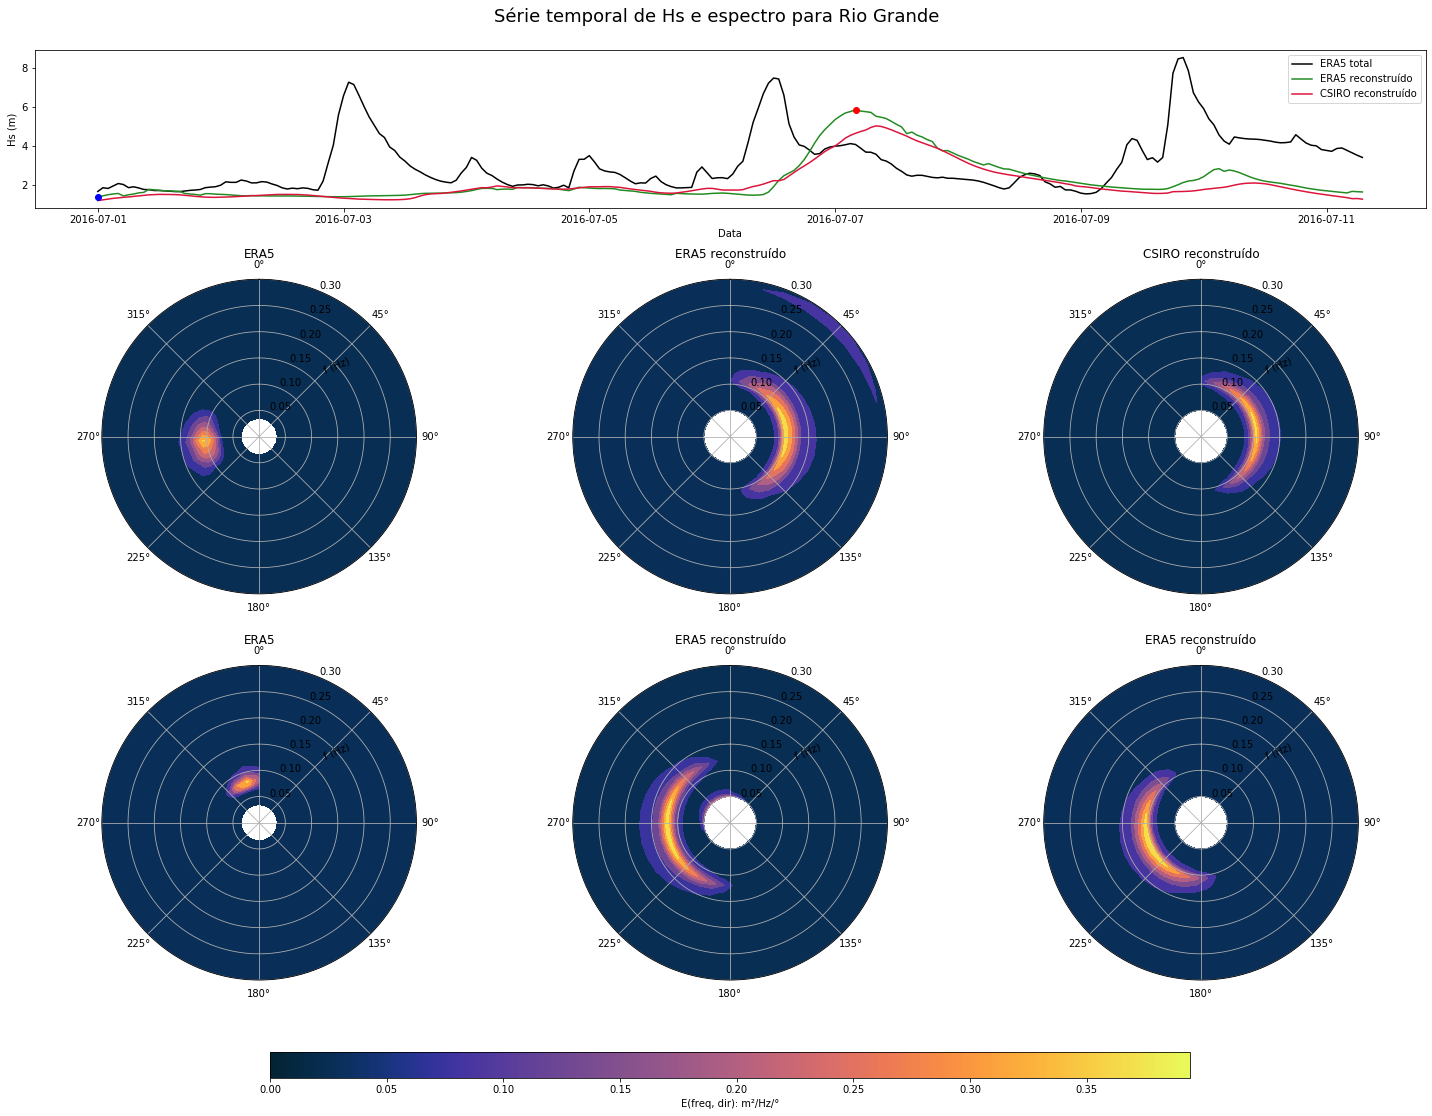

In [162]:
import math

# Create spec xarrays
efth_era_r = xr.DataArray(data=spec_era_r[1][:len(time_era)],
                          coords=coords_efth,
                          dims=('time','freq', 'dir'),
                          name='efth')
efth_era = xr.DataArray(data=spec_floripa/(4*math.pi**2),
                        coords=coords_efth_era,
                        dims=('time','freq', 'dir'),
                        name='efth')
efth_csiro_r = xr.DataArray(data=spec_csiro_r[1][:len(time_era)],
                            coords=coords_efth,
                            dims=('time','freq', 'dir'),
                            name='efth')

# Extract Hs

from wavespectra.specarray import SpecArray

hs_era_r = efth_era_r.spec.hs()
hs_era = efth_era.spec.hs()
hs_csiro_r = efth_csiro_r.spec.hs()

hs_val = list(hs_era_r.values)

hs_min = hs_val.index(hs_era_r.min())
hs_max = hs_val.index(hs_era_r.max())

# Define gridspecs

import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(20, 15))
plt.suptitle(f'Série temporal de Hs e espectro para Rio Grande', 
             y=1.03, fontsize=18)

gs = gridspec.GridSpec(4, 6, height_ratios=[1, 2, 2, 1/6])
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0:2], polar=True)
ax3 = fig.add_subplot(gs[1, 2:4], polar=True)
ax4 = fig.add_subplot(gs[1, 4:6], polar=True)
ax5 = fig.add_subplot(gs[2, 0:2], polar=True)
ax6 = fig.add_subplot(gs[2, 2:4], polar=True)
ax7 = fig.add_subplot(gs[2, 4:6], polar=True)
ax8 = fig.add_subplot(gs[3, 1:5])

norm = plt.Normalize((spec_era_r[1][hs_max]).min(), (spec_era_r[1][hs_max]).max())
colors = cmocean.cm.deep_r(norm(spec_era_r[1]))

# Hs timeseries 
ax1.plot(time, hs_era.values, 'black',
         label='ERA5 total')
ax1.plot(time, hs_era_r.values, 'forestgreen',
         label='ERA5 reconstruído')
ax1.plot(time, hs_csiro_r.values, 'crimson',
         label='CSIRO reconstruído')
ax1.plot(time[hs_min], hs_era_r.values[hs_min], 'bo',
         time[hs_max], hs_era_r.values[hs_max], 'ro')
ax1.legend()
ax1.set(xlabel='Data', ylabel='Hs (m)')

# Largest Hs plots

# ERA5
ax2.contourf(theta_era, r_era, spec_floripa[hs_min].transpose(),
             cmap=cmocean.cm.thermal)
ax2.set(title='ERA5')
ax2.set_rlim(0, 0.3)
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
label_position=ax2.get_rlabel_position()
ax2.text(np.radians(label_position+25),ax2.get_rmax()/1.5,'f (Hz)',
         rotation=label_position,ha='center',va='center')

# ERA5 reconstruído
ax3.contourf(theta, r, spec_era_r[1][hs_min].transpose(),
             cmap=cmocean.cm.thermal)
ax3.set(title='ERA5 reconstruído')
ax3.set_rlim(0, 0.3)
ax3.set_theta_zero_location('N')
ax3.set_theta_direction(-1)
label_position=ax3.get_rlabel_position()
ax3.text(np.radians(label_position+25),ax3.get_rmax()/1.5,'f (Hz)',
         rotation=label_position,ha='center',va='center')

# CSIRO reconstruído
ax4.contourf(theta, r, spec_csiro_r[1][hs_min].transpose(),
             cmap=cmocean.cm.thermal)
ax4.set(title='CSIRO reconstruído')
ax4.set_rlim(0, 0.3)
ax4.set_theta_zero_location('N')
ax4.set_theta_direction(-1)
label_position=ax4.get_rlabel_position()
ax4.text(np.radians(label_position+25),ax4.get_rmax()/1.5,'f (Hz)',
         rotation=label_position,ha='center',va='center')

# Smallest Hs plots

# ERA5
ax5.contourf(theta_era, r_era, spec_floripa[hs_max].transpose(),
             cmap=cmocean.cm.thermal)
ax5.set(title='ERA5')
ax5.set_rlim(0, 0.3)
ax5.set_theta_zero_location('N')
ax5.set_theta_direction(-1)
label_position=ax5.get_rlabel_position()
ax5.text(np.radians(label_position+25),ax5.get_rmax()/1.5,'f (Hz)',
         rotation=label_position,ha='center',va='center')

# ERA5 reconstruído
ax6.contourf(theta, r, spec_era_r[1][hs_max].transpose(),
             cmap=cmocean.cm.thermal)
ax6.set(title='ERA5 reconstruído')
ax6.set_rlim(0, 0.3)
ax6.set_theta_zero_location('N')
ax6.set_theta_direction(-1)
label_position=ax6.get_rlabel_position()
ax6.text(np.radians(label_position+25),ax6.get_rmax()/1.5,'f (Hz)',
         rotation=label_position,ha='center',va='center')

# CSIRO reconstruído
ax7.contourf(theta, r, spec_csiro_r[1][hs_max].transpose(),
             cmap=cmocean.cm.thermal)
ax7.set(title='ERA5 reconstruído')
ax7.set_rlim(0, 0.3)
ax7.set_theta_zero_location('N')
ax7.set_theta_direction(-1)
label_position=ax7.get_rlabel_position()
ax7.text(np.radians(label_position+25),ax7.get_rmax()/1.5,'f (Hz)',
         rotation=label_position,ha='center',va='center')


# Normalize the colors based on Z value

import matplotlib as mpl
    

cb1 = mpl.colorbar.ColorbarBase(ax8, cmap=cmocean.cm.thermal, 
                                norm=norm, orientation='horizontal')
cb1.set_label('''E(freq, dir): m²/Hz/°''')


plt.tight_layout()

plt.savefig('specs_floripa.jpg')